In [ ]:
# #importing all the libraries Numpy, Pandas, Face Match, os, Matplotlib, CV2 , Face Recogination , Tensorflow, Maxpooling, Tensorflow, Keras, Sklearn, Convoluation .

import tensorflow as tf 
import numpy as np
import os
from keras.layers import Conv2D, Activation, AveragePooling2D, MaxPooling2D, ZeroPadding2D, Input, concatenate
from keras.layers.core import Lambda, Dense, Flatten
from numpy import genfromtxt
import cv2
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.layers import *
from keras.models import Model
from sklearn.preprocessing import normalize
K.set_image_data_format('channels_first')
import random
import matplotlib.pyplot as plt
import keras
from keras.utils import plot_model
import sys

In [ ]:
# # Defning the path to dataset.

path_haar='../input/haar-cascade/haarcascade_frontalface_default.xml'
PATH='../input/face-match/trainset'

In [ ]:
## Allocating memory space to the specified files.

reference_images=[]
selfies=[]
n_sub=0

In [ ]:
# Locating the files inside the folder trainset.
# Checking all the files of data and counting them.
# Script is used to find the scripted image.

for folder in os.listdir(PATH):
    subfolder=os.path.join(PATH,folder)
    for sub in os.listdir(subfolder):
        n_sub=n_sub+1
        img_dir=os.path.join(subfolder,sub)
        for img_raw in os.listdir(img_dir):
            if 'script' in img_raw:
                reference_images.append(img_raw)
            else :
                selfies.append(img_raw)

In [ ]:
# Displaying the data we have like no. of folders, employee, selfies, script images.

print("The total number of Folders in dataset : ",len(os.listdir(PATH)))
print("The total number of Employee in dataset : ",n_sub)
print("The total number of selfies are : ",len(selfies))
print("The total number of script images are : ",len(reference_images))

The total number of Folders in dataset :  12
The total number of Employee in dataset :  1012
The total number of selfies are :  3198
The total number of script images are :  1221


In [ ]:
## Fetching the file from System and then Displaying the image.

image=cv2.imread('../input/face-match/trainset/0003/0003_0000345/0000002.jpg')

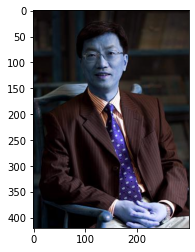

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
image=cv2.imread('../input/face-match/trainset/0003/0003_0000345/0003_0000345_script.jpg')

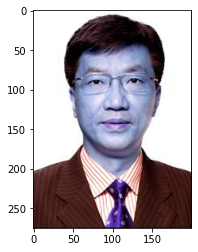

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
# Defining the Model, Inception Block , Function Model.
# Using convolutional neural network 2D, Inception, Activation Layer, Maxpooling, Lambda function. 

def inception_block_1a(X):
    X_3=Conv2D(96,(1,1),data_format='channels_first',name='inception_3a_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3a_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(128,(3,3),data_format='channels_first',name='inception_3a_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3a_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    X_5=Conv2D(16,(1,1),data_format='channels_first',name='inception_3a_5x5_conv1')(X)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3a_5x5_bn1')(X_5)
    X_5=Activation('relu')(X_5)
    X_5=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_5)
    X_5=Conv2D(32,(5,5),data_format='channels_first',name='inception_3a_5x5_conv2')(X_5)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3a_5x5_bn2')(X_5)
    X_5=Activation('relu')(X_5)
    
    X_pool = MaxPooling2D(pool_size=3, strides=2, data_format='channels_first')(X)
    X_pool = Conv2D(32, (1, 1), data_format='channels_first', name='inception_3a_pool_conv')(X_pool)
    X_pool = BatchNormalization(axis=1, epsilon=0.00001, name='inception_3a_pool_bn')(X_pool)
    X_pool = Activation('relu')(X_pool)
    X_pool = ZeroPadding2D(padding=((3, 4), (3, 4)), data_format='channels_first')(X_pool)
    
    X_1=Conv2D(64,(1,1),data_format='channels_first',name='inception_3a_1x1_conv')(X)
    X_1=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3a_1x1_bn')(X_1)
    X_1=Activation('relu')(X_1)
    
    inception=concatenate([X_3,X_5,X_pool,X_1],axis=1)
    return inception

def inception_block_1b(X):
    X_3=Conv2D(96,(1,1),data_format='channels_first',name='inception_3b_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(128,(3,3),data_format='channels_first',name='inception_3b_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    X_5=Conv2D(32,(1,1),data_format='channels_first',name='inception_3b_5x5_conv1')(X)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_5x5_bn1')(X_5)
    X_5=Activation('relu')(X_5)
    X_5=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_5)
    X_5=Conv2D(64,(5,5),data_format='channels_first',name='inception_3b_5x5_conv2')(X_5)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_5x5_bn2')(X_5)
    X_5=Activation('relu')(X_5)
    
    X_P=AveragePooling2D(pool_size=(3,3),strides=(3,3),data_format='channels_first')(X)
    X_P=Conv2D(64,(1,1),data_format='channels_first',name='inception_3b_pool_conv')(X_P)
    X_P=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_pool_bn')(X_P)
    X_P=Activation('relu')(X_P)
    X_P=ZeroPadding2D(padding=(4,4),data_format='channels_first')(X_P)
    
    X_1=Conv2D(64,(1,1),data_format='channels_first',name='inception_3b_1x1_conv')(X)
    X_1=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3b_1x1_bn')(X_1)
    X_1=Activation('relu')(X_1)
    
    inception=concatenate([X_3,X_5,X_P,X_1],axis=1)
    return inception

def inception_block_1c(X):
    X_3=Conv2D(128,(1,1),data_format='channels_first',name='inception_3c_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3c_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(256,(3,3),strides=(2,2),data_format='channels_first',name='inception_3c_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3c_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    X_5=Conv2D(32,(1,1),data_format='channels_first',name='inception_3c_5x5_conv1')(X)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3c_5x5_bn1')(X_5)
    X_5=Activation('relu')(X_5)
    X_5=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_5)
    X_5=Conv2D(64,(5,5),strides=(2,2),data_format='channels_first',name='inception_3c_5x5_conv2')(X_5)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_3c_5x5_bn2')(X_5)
    X_5=Activation('relu')(X_5)
    
    X_P=MaxPooling2D(pool_size=3,strides=2,data_format='channels_first')(X)
    X_P=ZeroPadding2D(padding=((0,1),(0,1)),data_format='channels_first')(X_P)
    

    inception=concatenate([X_3,X_5,X_P],axis=1)
    return inception

def inception_block_2a(X):
    X_3=Conv2D(96,(1,1),data_format='channels_first',name='inception_4a_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(192,(3,3),data_format='channels_first',name='inception_4a_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    X_5=Conv2D(32,(1,1),data_format='channels_first',name='inception_4a_5x5_conv1')(X)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_5x5_bn1')(X_5)
    X_5=Activation('relu')(X_5)
    X_5=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_5)
    X_5=Conv2D(64,(5,5),data_format='channels_first',name='inception_4a_5x5_conv2')(X_5)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_5x5_bn2')(X_5)
    X_5=Activation('relu')(X_5)
    
    X_P=AveragePooling2D(pool_size=(3,3),strides=(3,3),data_format='channels_first')(X)
    X_P=Conv2D(128,(1,1),data_format='channels_first',name='inception_4a_pool_conv')(X_P)
    X_P=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_pool_bn')(X_P)
    X_P=Activation('relu')(X_P)
    X_P=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_P)
    
    X_1=Conv2D(256,(1,1),data_format='channels_first',name='inception_4a_1x1_conv')(X)
    X_1=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4a_1x1_bn')(X_1)
    X_1=Activation('relu')(X_1)
    
    inception=concatenate([X_3,X_5,X_P,X_1],axis=1)
    return inception

def inception_block_2b(X):
    X_3=Conv2D(160,(1,1),data_format='channels_first',name='inception_4e_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4e_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(256,(3,3),strides=(2,2),data_format='channels_first',name='inception_4e_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4e_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    X_5=Conv2D(64,(1,1),data_format='channels_first',name='inception_4e_5x5_conv1')(X)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4e_5x5_bn1')(X_5)
    X_5=Activation('relu')(X_5)
    X_5=ZeroPadding2D(padding=(2,2),data_format='channels_first')(X_5)
    X_5=Conv2D(128,(5,5),strides=(2,2),data_format='channels_first',name='inception_4e_5x5_conv2')(X_5)
    X_5=BatchNormalization(axis=1,epsilon=0.00001,name='inception_4e_5x5_bn2')(X_5)
    X_5=Activation('relu')(X_5)
    
    X_P=MaxPooling2D(pool_size=3,strides=2,data_format='channels_first')(X)
    X_P=ZeroPadding2D(padding=((0,1),(0,1)),data_format='channels_first')(X_P)

    inception=concatenate([X_3,X_5,X_P],axis=1)
    return inception

def inception_block_3a(X):
    X_3=Conv2D(96,(1,1),data_format='channels_first',name='inception_5a_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5a_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(384,(3,3),data_format='channels_first',name='inception_5a_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5a_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)

    
    X_P=AveragePooling2D(pool_size=(3,3),strides=(3,3),data_format='channels_first')(X)
    X_P=Conv2D(96,(1,1),data_format='channels_first',name='inception_5a_pool_conv')(X_P)
    X_P=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5a_pool_bn')(X_P)
    X_P=Activation('relu')(X_P)
    X_P=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_P)
    
    X_1=Conv2D(256,(1,1),data_format='channels_first',name='inception_5a_1x1_conv')(X)
    X_1=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5a_1x1_bn')(X_1)
    X_1=Activation('relu')(X_1)
    
    inception=concatenate([X_3,X_P,X_1],axis=1)
    return inception
def inception_block_3b(X):
    X_3=Conv2D(96,(1,1),data_format='channels_first',name='inception_5b_3x3_conv1')(X)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5b_3x3_bn1')(X_3)
    X_3=Activation('relu')(X_3)
    X_3=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_3)
    X_3=Conv2D(384,(3,3),data_format='channels_first',name='inception_5b_3x3_conv2')(X_3)
    X_3=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5b_3x3_bn2')(X_3)
    X_3=Activation('relu')(X_3)
    
    
    X_P=MaxPooling2D(pool_size=(3,3),strides=2,data_format='channels_first')(X)
    X_P=Conv2D(96,(1,1),data_format='channels_first',name='inception_5b_pool_conv')(X_P)
    X_P=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5b_pool_bn')(X_P)
    X_P=Activation('relu')(X_P)
    X_P=ZeroPadding2D(padding=(1,1),data_format='channels_first')(X_P)
    
    X_1=Conv2D(256,(1,1),data_format='channels_first',name='inception_5b_1x1_conv')(X)
    X_1=BatchNormalization(axis=1,epsilon=0.00001,name='inception_5b_1x1_bn')(X_1)
    X_1=Activation('relu')(X_1)
    
    inception=concatenate([X_3,X_P,X_1],axis=1)
    return inception


def FinalModel(input_shape):
    
    X_input=Input(input_shape)
    
    X=ZeroPadding2D(padding=(3,3))(X_input)
    X=Conv2D(64,(7,7),strides=(2,2),name='conv1')(X)
    X=BatchNormalization(axis=1,name='bn1')(X)
    X=Activation('relu')(X)
    
    X=ZeroPadding2D((1,1))(X)
    X=MaxPooling2D((3,3),strides=2)(X)
    
    X=Conv2D(64,(1,1),strides=(1,1),name='conv2')(X)
    X=BatchNormalization(axis=1,epsilon=0.00001,name='bn2')(X)
    X=Activation('relu')(X) 
    
    X=ZeroPadding2D(padding=(1,1))(X)
    
    X=Conv2D(192,(3,3),strides=(1,1),name='conv3')(X)
    X=BatchNormalization(axis=1,epsilon=0.00001,name='bn3')(X)
    X=Activation('relu')(X)
    
    X=ZeroPadding2D(padding=(1,1))(X)
    X=MaxPooling2D(pool_size=(3,3),strides=(2,2))(X)
    
    X=inception_block_1a(X)
    X=inception_block_1b(X)
    X=inception_block_1c(X)
    
    X=inception_block_2a(X)
    X=inception_block_2b(X)
    
    X=inception_block_3a(X)
    X=inception_block_3b(X)
    
    X=AveragePooling2D(pool_size=(3,3),strides=(1,1),data_format='channels_first')(X)
    X=Flatten()(X)
    X=Dense(128,activation='relu',kernel_initializer='glorot_normal',name='dense_layer')(X)
    X=Lambda(lambda x:K.l2_normalize(x,axis=1),name='lambda_1')(X)
    
    model=Model(inputs=X_input,outputs=X,name='FaceRecognotionModel')
    return model    


In [ ]:
# Giving Shape to the Model.

model=FinalModel(input_shape=(3,96,96))

In [ ]:
# Doing Model Summary. 
model.summary()

Model: "FaceRecognotionModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3, 96, 96)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 3, 102, 102)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 48, 48)   9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn1 (BatchNormalization)        (None, 64, 48, 48)   256         conv1[0][0]                      
_______________________________________________________________________________

In [ ]:
# Using Triplet Loss Function.

def triplet_loss_t(y_true,y_pred):
    #print(y_pred)
    anchor=y_pred[:,0:128]
    pos=y_pred[:,128:256]
    neg=y_pred[:,256:384]
    
    positive_distance = K.sum(K.abs(anchor-pos), axis=1)
    negative_distance = K.sum(K.abs(anchor-neg), axis=1)
    probs=K.softmax([positive_distance,negative_distance],axis=0)
    #loss = positive_distance - negative_distance+alpha
    loss=K.mean(K.abs(probs[0])+K.abs(1.0-probs[1]))
    return loss

In [ ]:
# Resize the image to match the input shape of the model.

def localize_resize(path_image,path_haar='../input/haar-cascade/haarcascade_frontalface_default.xml'):
    image=cv2.imread(path_image)
    
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    classifier=cv2.CascadeClassifier(path_haar)
    faces=classifier.detectMultiScale(gray,1.1,6)
    if len(faces) != 1:#condition if we dont have any faces or cant be detected y haar cascade we will skip those
        return -1
    
    x,y,w,h=faces.squeeze()
    crop=image[y:y+h,x:x+w]
    image=cv2.resize(crop,(96,96))
    image=np.transpose(image,(2,0,1))
    image=image.astype('float32')/255.0
    return image

In [ ]:
# Using the Data Generator.

def data_gen(batch_size=32):
    while True:
        i=0
        positive=[]
        anchor=[]
        negative=[]    
        

        while(i<batch_size):
            r=random.choice(os.listdir(PATH))
            p=PATH+'/'+ r
            id=os.listdir(p)
            ra=random.sample(id,2)
            pos_dir=p+'/'+ra[0]
            neg_dir=p+'/'+ra[1]
            pos=pos_dir+'/'+random.choice(os.listdir(pos_dir))
            anc=pos_dir+'/'+random.choice([x for x in os.listdir(pos_dir) if 'script' in x])
            neg=neg_dir+'/'+random.choice(os.listdir(neg_dir))
            pos_img=localize_resize(pos,path_haar)
                    #print(pos+anc+neg)
            if pos_img is -1:
                continue
            neg_img=localize_resize(neg,path_haar)
            if neg_img is -1:
                continue
            anc_img=localize_resize(anc,path_haar)
            if anc_img is -1:
                continue
            positive.append(list(pos_img))
                #print('positive{0}'.format(i))
            negative.append(list(neg_img))
                #print('negative{0}'.format(i))
            anchor.append(list(anc_img))
                #print('anchor{0}'.format(i))
            i=i+1
        #return anchor,positive,negative
        yield ([np.array(anchor),np.array(positive),np.array(negative)],np.zeros((batch_size,1)).astype("float32"))

In [ ]:
# Defining model for triplet loss.

triplet_model_a=Input((3,96,96))
triplet_model_n=Input((3,96,96))
triplet_model_p=Input((3,96,96))
triplet_model_out=Concatenate()([model(triplet_model_a),model(triplet_model_p),model(triplet_model_n)])
triplet_model=Model([triplet_model_a,triplet_model_p,triplet_model_n],triplet_model_out)

In [ ]:
# Applying Adam Optimizer to the Triplet model.

triplet_model.compile(optimizer='adam',loss=triplet_loss_t)

In [ ]:
# Triplet Model Summary.

triplet_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 3, 96, 96)]  0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 3, 96, 96)]  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 3, 96, 96)]  0                                            
__________________________________________________________________________________________________
FaceRecognotionModel (Functiona (None, 128)          3743280     input_2[0][0]                    
                                                                 input_4[0][0]         

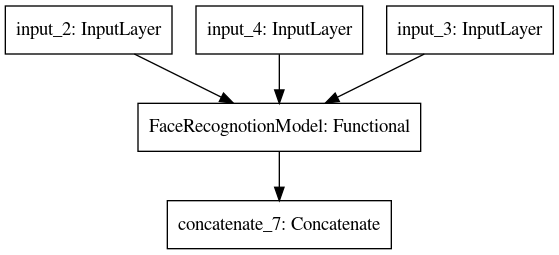

In [ ]:
# Plotting the triplet model, how it is working.

plot_model(triplet_model)

In [ ]:
# Traning the triplet Model by us using the 5 epochs with steps per epochs as 100.

triplet_model.fit(data_gen(),steps_per_epoch=100,epochs=5)

In [ ]:
# Saving the Triplet Model.

triplet_model.save('triplet_model.h5')

In [ ]:
triplet_model=keras.models.load_model('../input/trained-model-from-version-1/triplet_model.h5',custom_objects={'triplet_loss_t':triplet_loss_t})

In [ ]:
#To loacalize the face and resize the image
def image_resizing(image,path_haar):

    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    classifier=cv2.CascadeClassifier(path_haar)
    faces=classifier.detectMultiScale(gray,1.1,6)

    if len(faces)!=1:
        print('More than one Image in the selfie')
        sys.exit(0)
    x,y,w,h=faces.squeeze()
    crop=image[y:y+h,x:x+w]
    image=cv2.resize(crop,(96,96))

    return image

In [ ]:
# Embedding of the given image.

def encode_img(img1,triplet_model):
    #img1=cv2.imread(path,1)
    img=img1[...,::-1]
    img=np.around(np.transpose(img,(2,0,1))/255,decimals=12)
    x_train=np.array([img])
    emb=triplet_model.layers[3].predict_on_batch(x_train)
    return emb

In [ ]:
# Calculating the distance between the embedding and score.
# Thershold as 0.65 & Interval as 0.3.

threshold=0.65
interval=0.3
def confidence_value(ref_encode,img_encode,thres=threshold):
    #diff=np.max(img_encode-ref_encode)
    dist=np.linalg.norm((img_encode-ref_encode))
    #confidence=(1-K.eval(tf.minimum(dist,1)))
    confidence=(threshold-max([dist,interval]))/(threshold-interval)
    return dist,confidence

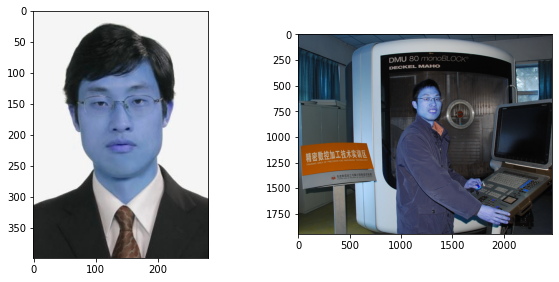

In [ ]:
# Using the same person image.
# Comapring the image and showing it in output.

rimage=cv2.imread('../input/face-match/trainset/0006/0006_0000557/0006_0000557_script.jpg')
image=cv2.imread('../input/face-match/trainset/0006/0006_0000557/0000000.jpg')

fig=plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(rimage)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(image)

In [ ]:
# Checking the image correctness and showing the confidence of correctness.

rimage=cv2.imread('../input/face-match/trainset/0006/0006_0000557/0006_0000557_script.jpg')
image=cv2.imread('../input/face-match/trainset/0006/0006_0000557/0000000.jpg')
rimg=image_resizing(rimage,path_haar)
img=image_resizing(image,path_haar)
r_encode=encode_img(rimg,triplet_model)
img_encode=encode_img(img,triplet_model)
dist,conf=confidence_value(r_encode,img_encode)
if dist<threshold:
    print("Match with a confidence of ",conf*100)
    #print("Distance ",dist)
else:
    print("No Match with a confidence of ",abs(conf*100))

Match with a confidence of  79.11050149372646


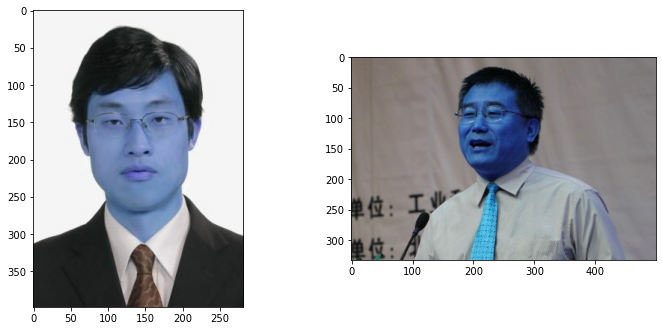

In [ ]:
# Using the different person image.
# Comapring the image and showing it in output.

rimage=cv2.imread('../input/face-match/trainset/0006/0006_0000557/0006_0000557_script.jpg')
image=cv2.imread('../input/face-match/trainset/0002/0002_0000308/0000001.jpg')

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(rimage)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(image)

In [ ]:
# Checking the image correctness and showing the confidence of correctness.
# Giving no match because we are using the we are using two different person images.

rimage=cv2.imread('../input/face-match/trainset/0006/0006_0000557/0006_0000557_script.jpg')
image=cv2.imread('../input/face-match/trainset/0002/0002_0000308/0000001.jpg')
rimg=image_resizing(rimage,path_haar)
img=image_resizing(image,path_haar)
r_encode=encode_img(rimg,triplet_model)
img_encode=encode_img(img,triplet_model)
dist,conf=confidence_value(r_encode,img_encode)
if dist<threshold:
    print("Match with a confidence of ",conf*100)
    #print("Distance ",dist)
else:
    print("No Match with a confidence of ",abs(conf*100))

No Match with a confidence of  22.726801463535846
